<a href="https://colab.research.google.com/github/Rajshekhar-Reddy1/-Insaid-AI-Regards/blob/main/CustomerDelinquencyAnalysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="120" /></center>

---
# **Table of Contents**
---
**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  - **4.3** [**Pre Profiling Report**](#Section43)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Identification & Handling of Missing Data**](#Section51)
  - **5.2** [**Identification & Handling of Redundant Data**](#Section52)
  - **5.3** [**Identification & Handling of Inconsistent Data Types**](#Section53)
  - **5.4** [**Post Profiling Report**](#Section54)

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Baseline Models: Using Essential Features**](#Section81)
  - **8.2** [**Oversampling Models: Using Essential Features**](#Section82)
  - **8.3** [**Performance Chart**](#Section83)
  
**9.** [**Conclusion**](#Section9)<br>

---

<a name = Section1></a>

---
# **1. Introduction**
---

- Delinquency is a **situation** that arises when an **activity or situation** **does not occur at its scheduled (or expected) time**.

- Many donors, experts, and **microfinance institutions (MFI)** have become convinced that using **mobile financial services (MFS)** is more convenient and **efficient**, and **less costly**, **than** the traditional **high-touch model** for **delivering microfinance services**.

- **MFS** becomes especially **useful** when **targeting** the **unbanked poor living in remote areas**.

- The **implementation** of **MFS**, though, has been **uneven** with both significant **challenges** and **successes**.

- Today, **microfinance** is **widely accepted** as a **poverty-reduction tool**, representing **$70 billion in outstanding loans** and a **global outreach of 200 million clients**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Telecom/MFI.jpg" /></center>

<a name = Section2></a>

---
# **2. Problem Statement**
---

- A **Telecom collaborates** with an **MFI** to **provide micro-credit on mobile balances to be paid back in 5 days**.

- The consumer is believed to be **delinquent** if he **deviates from the path of paying back the loaned amount within 5 days**.

- To create a **delinquency model** which predicts whether the customer will be **able to pay back the loaned amount within 5 days of insurance of loan**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Telecom/download1.jpg" /></center>

**<h4>Scenario:</h4>**

A telecom company Insignia, wants to predict whether a customer will be delinquent or not; so that they can be prepared for customers which can turn out to be defaulters later.

|Target Feature|Potential Values|
| :-- | :-- |
|target|0: Failure|
||1: Success|

<a id = Section3></a>

---
# **3. Installing & Importing Libraries**
---

<a id = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q pandas-profiling              # Toolbox for Generating Statistics Report
!pip install -q yellowbrick                   # Toolbox for Measuring Machine Performance

<a id = Section32></a>
### **3.2 Upgrading Libraries**

- After upgrading, you need to restart the runtime.

- Make sure not to execute the cell 3.1 and cell below 3.2 again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 40.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 27.6 MB/s eta 0:00:00


<a id = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
import pandas.util.testing as tm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

# For Numerical Python
import numpy as np

# For Random seed values
from random import randint

# For Scientifc Python
from scipy import stats

# For datetime
from datetime import datetime as dt

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For Preprocessing
from sklearn.preprocessing import StandardScaler

# For Feature Selection
from sklearn.feature_selection import SelectFromModel

# For Feature Importances
from yellowbrick.model_selection import FeatureImportances

# To handle class imbalance problem
from imblearn.over_sampling import SMOTE

# For metrics evaluation
from sklearn.metrics import precision_recall_curve, classification_report, plot_confusion_matrix

# For Data Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

<a name=Section4></a>

---
# **4. Data Acquisition & Description**
---

This **dataset** is based on the **historic data of customers account** and whether a particular customer **turned out to be delinquent or not**.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 209600 | 36 | 28 MB |

| Id | Feature | Description |#| Id | Feature | Description |
| :-- | :--| :--| :-- | :-- | :-- | :-- |
|01| **target** | If  user has paid back the credit amount within 5 days of issuing the loan.|#|19|**median_ma_rech90**|Median of amount of recharges done in last 90 days at user level|
||| Contains: [0: Failure, 1: Success] |#||||
|02| **msid** | Mobile number of the user |#|20|**medianprebal90**|Median of main account balance just before recharge in last 90 days at user level|
|03| **length** | Age on cellular network in days|#|21|**cnt_da_rech30**|Number of times data account got recharged in last 30 days|
|04| **daily_30** | Daily amount spent, averaged over last 30 days |#|22|**fr_da_rech30**|Frequency of data account recharge in last 30 days|
|05| **daily_90** | Daily amount spent, averaged over last 90 days |#|23|**cnt_da_rech90**|Number of times data account got recharged in last 90 days|
|06| **rental30** | Average main account balance over last 30 days |#|24|**fr_da_rech90**|Frequency of data account recharge in last 30 days|
|07| **rental90** | Average main account balance over last 90 days |#|25|**num_loans30**|Number of loans taken by user in last 30 days|
|08| **last_rech_ma** | Number of days till last recharge of main account |#|26|**total_loans30**|Total number of loans taken by user in last 30 days|
|09| **last_rech_da** | Number of days till last recharge of data account |#|27|**max_loans30**|Maximum amount of loan taken by user in last 30 days|
|10| **last_rech_amt_ma** | Amount of last recharge of main account |#|28|**median_loans30**|Median of amounts of loan taken by user in last 30 days|
|11| **cnt_ma_rech30** | Number of times main account got recharged in last 30 days |#|29|**num_loans90**|Number of loans taken by user in last 90 days|
|12| **fr_ma_rech30** | Frequency of main account recharge in last 30 days |#|30|**total_loans90**|Total number of loans taken by user in last 90 days|
|13| **total_ma_rech30** | Total amount of recharge in main account over last 30 days |#|31|**max_loans90**|Maximum amount of loan taken by user in last 90 days|
|14| **median_ma_rech30** | Median of amount of recharges done in last 30 days at user level |#|32|**median_loans90**|Median of amounts of loan taken by user in last 90 days|
|15| **medianprebal30** | Median of main account balance just before recharge in last 30 days at user level  |#|33|**paybacktime30**|Average payback time in days over last 30 days|
|16| **cnt_ma_rech90** | Number of times main account got recharged in last 90 days |#|34|**paybacktime30**|Average payback time in days over last 90 days|
|17| **fr_ma_rech90** | Frequency of main account recharge in last 90 days |#|35|**circle**|Telecom circle|
|18| **total_ma_rech90** | Total amount of recharge in main account over last 90 days |#|36|**date**|Date|

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Telecom/telecom_delinquency.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (209600, 36)


,target,msid,length,daily_30,daily_90,rental30,rental90,last_rech_ma,last_rech_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,total_ma_rech30,median_ma_rech30,medianprebal30,cnt_ma_rech90,fr_ma_rech90,total_ma_rech90,median_ma_rech90,medianprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,num_loans30,total_loans30,max_loans30,median_loans30,num_loans90,total_loans90,max_loans90,median_loans90,paybacktime30,paybacktime90,circle,date
0,1,04766I85348,1358.0,18091.850000,18219.550000,10868.78,12102.18,6.0,0.0,7526,3,12.0,23448,7526.0,95.77,6,45,38963,5787.0,36.77,0.0,0.0,0,0,4.0,24,6.0,0.0,5.0,30,6,0.0,4.333333,6.200000,UPW,20-07-2016
1,0,55320I85339,187.0,27.733333,27.733333,341.28,341.28,4.0,0.0,773,4,12.0,7152,1156.0,72.00,4,12,7152,1156.0,72.00,0.0,0.0,0,0,3.0,18,6.0,0.0,3.0,18,6,0.0,8.333333,8.333333,UPW,16-06-2016
2,0,91152I90848,780.0,0.000000,0.000000,535.92,535.92,0.0,0.0,0,0,0.0,0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1.0,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,22-06-2016
3,0,95169I90584,1313.0,80.109333,80.109333,-229.46,-229.46,15.0,0.0,8000,2,11.0,13214,6607.0,64.90,3,32,18154,5214.0,59.40,0.0,0.0,0,0,1.0,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,22-06-2016
4,1,03712I89233,624.0,61.698000,61.698000,182.00,182.00,2.0,0.0,1539,2,13.0,3078,1539.0,54.80,3,47,6545,1539.0,29.30,0.0,0.0,0,0,3.0,18,6.0,0.0,3.0,18,6,0.0,5.666667,5.666667,UPW,26-06-2016


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
print('Described Column Length:', len(data.describe().columns))
data.describe()

Described Column Length: 33


,target,length,daily_30,daily_90,rental30,rental90,last_rech_ma,last_rech_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,total_ma_rech30,median_ma_rech30,medianprebal30,cnt_ma_rech90,fr_ma_rech90,total_ma_rech90,median_ma_rech90,medianprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,num_loans30,total_loans30,max_loans30,median_loans30,num_loans90,total_loans90,max_loans90,median_loans90,paybacktime30,paybacktime90
count,209600.000000,209555.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209555.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000,209600.000000
mean,0.875172,8110.428368,5381.322697,6082.412441,2692.631337,3483.447113,3755.722514,3712.078944,2064.402214,3.977972,3737.230419,7704.337099,1812.779442,3851.800668,6.315301,7.717247,12395.964766,1864.555995,92.023607,262.569340,3749.369225,0.041493,0.045711,2.758927,17.951765,274.649832,0.054029,18.520353,23.644981,6.703168,0.046076,3.398886,4.321531
std,0.330525,75688.333474,9220.494668,10918.657667,4308.566859,5770.412153,53904.996432,53373.946451,2370.764645,4.256053,53642.733734,10139.519847,2070.844074,54005.477089,7.193400,12.590976,16857.627591,2081.661577,369.209731,4183.828387,53884.519520,0.397549,0.951370,2.554613,17.379525,4245.194037,0.218037,224.793690,26.469540,2.103896,0.200688,8.813804,10.308118
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.452250,42.693333,280.417500,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.000000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.587000,1500.000000,1083.575000,1334.065000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.000000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.272500,3356.995000,4201.867500,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.000000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,999171.809400,55000.000000,203.000000,999606.368100,810096.000000,55000.000000,999479.419300,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


**Observations:**
- For a customer, **527 days** was the **average age on cellular network**.

- **Daily amount spent** from the main account, **averaged over last 30 days** is **9220 Indonesian Rupiah**.

- **Daily amount spent** from the main account, **averaged over last 90 days** is **10918 Indonesian Rupiah**.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209600 entries, 0 to 209599
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   target            209600 non-null  int64  
 1   msid              209600 non-null  object 
 2   length            209555 non-null  float64
 3   daily_30          209600 non-null  float64
 4   daily_90          209600 non-null  float64
 5   rental30          209600 non-null  float64
 6   rental90          209600 non-null  float64
 7   last_rech_ma      209600 non-null  float64
 8   last_rech_da      209600 non-null  float64
 9   last_rech_amt_ma  209600 non-null  int64  
 10  cnt_ma_rech30     209600 non-null  int64  
 11  fr_ma_rech30      209600 non-null  float64
 12  total_ma_rech30   209600 non-null  int64  
 13  median_ma_rech30  209600 non-null  float64
 14  medianprebal30    209600 non-null  float64
 15  cnt_ma_rech90     209600 non-null  int64  
 16  fr_ma_rech90      20

**Observations:**

- There are **36 features** out of which **20 are float**, **13 are integer** and **3 are of object type**.

<a id = Section43></a>
### **4.3 Pre Profiling Report**

- For quick analysis pandas profiling is very handy.
- Generates profile reports from a pandas DataFrame.
- For each column statistics are presented in an interactive HTML report.

In [ ]:
profile = ProfileReport(df = data)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [ ]:
from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**
- There are **36 features** in the dataset.

- There are **missing data cells**.

- There are **8 duplicate rows**.

- There are **no duplicate columns**.

- **Mobile number** of users is **normally distributed**.

<a  name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a id = Section51></a>
### **5.1 Identification & Handling of Missing Data**

**Before Handling Missing Data:**

In [ ]:
missing_frame = pd.DataFrame(index = data.columns.values)
missing_frame['Null Frequency'] = data.isnull().sum().values
nullpercent = data.isnull().sum().values/data.shape[0]
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100
missing_frame['Zero Frequency'] = data[data == 0].count().values
zero_percent = data[data == 0].count().values / data.shape[0]
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,target,msid,length,daily_30,daily_90,rental30,rental90,last_rech_ma,last_rech_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,total_ma_rech30,median_ma_rech30,medianprebal30,cnt_ma_rech90,fr_ma_rech90,total_ma_rech90,median_ma_rech90,medianprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,num_loans30,total_loans30,max_loans30,median_loans30,num_loans90,total_loans90,max_loans90,median_loans90,paybacktime30,paybacktime90,circle,date
Null Frequency,0.00,0.0,45.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,45.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Missing Null %age,0.00,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Zero Frequency,26164.00,0.0,0.00,4144.00,4063.00,7568.00,6920.0,20746.0,202868.00,20998.00,27982.00,78687.00,27982.00,27982.00,30683.00,20953.0,65756.00,20953.0,20953.0,23394.00,205486.00,208021.00,204233.00,208735.00,3259.00,3259.00,3244.00,195451.00,2036.00,2043.00,2043.00,197431.00,106717.00,95703.00,0.0,0.0
Missing %age,12.48,0.0,0.00,1.98,1.94,3.61,3.3,9.9,96.79,10.02,13.35,37.54,13.35,13.35,14.64,10.0,31.37,10.0,10.0,11.16,98.04,99.25,97.44,99.59,1.55,1.55,1.55,93.25,0.97,0.97,0.97,94.19,50.91,45.66,0.0,0.0


**Observation:**

|Id|Feature|Problem|Solution|Reason|#|Id|Feature|Problem|Solution|Reason|
|:--|:--|:--|:--|:--|:--||:--|:--|:--|:--|
|01|target|Zero data|None|Feature is boolean.|#|19|median_ma_rech90|Zero data|None|Median of amount of recharges can be zero.|
|02|msid|None|None|None|#|20|medianprebal90|Zero data|None|Median account balance can be zero.|
|03|length|Null data|Medain Imputation|Feature in positively skewed.|#|21|cnt_da_rech30|Zero data|None|No. of times account got recharged can be zero.|
|04|daily_30|Zero data|None|Daily amount spent can be zero|#|22|fr_da_rech30|Zero data|None|Frequency of data account recharge can be zero.|
|05|daily_90|Zero data|None|Daily amount spent can be zero.|#|23|cnt_da_rech90|Zero data|None|No. of times data got recharged can be zero.|
|06|rental30|Zero data|None|Account balance can be zero.|#|24|fr_da_rech90|Zero data|None|Frequency of data account recharge can be zero.|
|07|rental90|Zero data|None|Account balance can be zero.|#|25|num_loans30|Null Data|Median Imputation|Feature has positive distribution.|
|08|last_rech_ma|Zero data|None|No. of days till last recharge can be zero.|#|26|total_loans30|Zero data|None|Total no. of loans taken can be zero.|
|09|last_rech_da|Zero data|None|No. of days till last recharge can be zero.|#|27|max_loans30|Zero data|None|Max amount of loan can be zero.|
|10|last_rech_amt_ma|Zero data|Median Imputation|Amount of last recharge can't be zero.|#|28|median_loans30|Zero data|None|Median amounts of loan taken can be zero.|
|11|cnt_ma_rech30|Zero data|None|No. of times account got recharged can be zero.|#|29|num_loans90|Zero data|None|No. of loans taken can be zero.|
|12|fr_ma_rech30|Zero data|None|Frequency of account recharge can be zero.|#|30|total_loans90|Zero data|None|Total no. of loans taken can be zero.|
|13|total_ma_rech30|Zero data|None|Total amount of recharge can be zero.|#|31|max_loans90|Zero data|None|Total amount of loans taken can be zero.|
|14|median_ma_rech30|Zero data|None|Median amount of recharges can be zero.|#|32|median_loans90|Zero data|None|Median amount of loans taken can be zero.|
|15|medianprebal30|Zero data|None|Median balance of account can be zero.|#|33|paybacktime30|Zero data|None|Average payback time in days can be zero.|
|16|cnt_ma_rech90|Zero data|None|No. of times account got recharged can be zero.|#|34|paybacktime90|Zero data|None|Average payback time in days can be zero.|
|17|fr_ma_rech90|Zero data|None|Frequency of account recharge can be zero.|#|35|circle|None|None|None|
|18|total_ma_rech90|Zero data|None|Total amount of recharge can be zero.|#|36|date|None|None|None|

**Performing Operations:**

In [ ]:
data['length'] = data['length'].replace(np.nan, data['length'].median())
data['last_rech_amt_ma'] = data['last_rech_amt_ma'].replace(0, data['last_rech_amt_ma'].median())
data['num_loans30'] = data['num_loans30'].replace(np.nan, data['num_loans30'].median())

**After Handling Missing Data:**

In [ ]:
missing_frame = pd.DataFrame(index = data.columns.values)
missing_frame['Null Frequency'] = data.isnull().sum().values
nullpercent = data.isnull().sum().values/data.shape[0]
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100
missing_frame['Zero Frequency'] = data[data == 0].count().values
zero_percent = data[data == 0].count().values / data.shape[0]
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,target,msid,length,daily_30,daily_90,rental30,rental90,last_rech_ma,last_rech_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,total_ma_rech30,median_ma_rech30,medianprebal30,cnt_ma_rech90,fr_ma_rech90,total_ma_rech90,median_ma_rech90,medianprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,num_loans30,total_loans30,max_loans30,median_loans30,num_loans90,total_loans90,max_loans90,median_loans90,paybacktime30,paybacktime90,circle,date
Null Frequency,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Missing Null %age,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Zero Frequency,26164.00,0.0,0.0,4144.00,4063.00,7568.00,6920.0,20746.0,202868.00,0.0,27982.00,78687.00,27982.00,27982.00,30683.00,20953.0,65756.00,20953.0,20953.0,23394.00,205486.00,208021.00,204233.00,208735.00,3259.00,3259.00,3244.00,195451.00,2036.00,2043.00,2043.00,197431.00,106717.00,95703.00,0.0,0.0
Missing %age,12.48,0.0,0.0,1.98,1.94,3.61,3.3,9.9,96.79,0.0,13.35,37.54,13.35,13.35,14.64,10.0,31.37,10.0,10.0,11.16,98.04,99.25,97.44,99.59,1.55,1.55,1.55,93.25,0.97,0.97,0.97,94.19,50.91,45.66,0.0,0.0


<a name = Section52></a>
### **5.2 Identification & Handling of Redundant Data**

- In this section **we will identify redundant rows and columns** in our data if present.

- For **handling duplicate features** we have **created a custom function**:
  -  It will identify duplicacy in **features with different name but similar values**.

In [ ]:
def duplicate_cols(dataframe):
  ls1 = []
  ls2 = []

  columns = dataframe.columns.values
  for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
      if (np.where(dataframe[columns[i]] == dataframe[columns[j]], True, False).all() == True):
        ls1.append(columns[i])
        ls2.append(columns[j])

  if ((len(ls1) == 0) & (len(ls2) == 0)):
    return None
  else:
    duplicate_frame = pd.DataFrame()
    duplicate_frame['Feature 1'] = ls1
    duplicate_frame['Feature 2'] = ls2
    return duplicate_frame

**Before Handling Duplicate Data**

In [ ]:
print('Contains Redundant Records?:', data.duplicated().any())
print('Duplicate Count:', data.duplicated().sum())
print('-----------------------------------------------------------------------')
print('Contains Redundant Features?:', duplicate_cols(data))

Contains Redundant Records?: True
Duplicate Count: 8
-----------------------------------------------------------------------
Contains Redundant Features?: None


**Observation:**

- We can see that **there are 8 redundant records present** in the data.

**Performing Operations**

In [ ]:
before_shape = data.shape
print('Data Shape [Before]:', before_shape)

data.drop_duplicates(inplace = True)

after_shape = data.shape
print('Data Shape [After]:', after_shape)

drop_nums = before_shape[0] - after_shape[0]
drop_percent = np.round(drop_nums / before_shape[0], decimals = 5) * 100

print('Drop Ratio:', drop_percent, '%')

Data Shape [Before]: (209600, 36)
Data Shape [After]: (209592, 36)
Drop Ratio: 0.004 %


**After Handling Duplicate Data**

In [ ]:
print('Contains Redundant Records?:', data.duplicated().any())
print('Duplicate Count:', data.duplicated().sum())
print('-----------------------------------------------------------------------')
print('Contains Redundant Features?:', duplicate_cols(data))

Contains Redundant Records?: False
Duplicate Count: 0
-----------------------------------------------------------------------
Contains Redundant Features?: None


**Observation:**

- We have **successfully dropped redundant data**.

<a name = Section53></a>
### **5.3 Identification & Handling of Inconsistent Data Types**

- In this section we will **identify** and **handle** the **feature** that may **contains inconsistent data type**.

**Before Handling Inconsistent Data Types**

In [ ]:
data.head(1)

,target,msid,length,daily_30,daily_90,rental30,rental90,last_rech_ma,last_rech_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,total_ma_rech30,median_ma_rech30,medianprebal30,cnt_ma_rech90,fr_ma_rech90,total_ma_rech90,median_ma_rech90,medianprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,num_loans30,total_loans30,max_loans30,median_loans30,num_loans90,total_loans90,max_loans90,median_loans90,paybacktime30,paybacktime90,circle,date
0,1,04766I85348,1358.0,18091.85,18219.55,10868.78,12102.18,6.0,0.0,7526,3,12.0,23448,7526.0,95.77,6,45,38963,5787.0,36.77,0.0,0.0,0,0,4.0,24,6.0,0.0,5.0,30,6,0.0,4.333333,6.2,UPW,20-07-2016


In [ ]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,target,msid,length,daily_30,daily_90,rental30,rental90,last_rech_ma,last_rech_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,total_ma_rech30,median_ma_rech30,medianprebal30,cnt_ma_rech90,fr_ma_rech90,total_ma_rech90,median_ma_rech90,medianprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,num_loans30,total_loans30,max_loans30,median_loans30,num_loans90,total_loans90,max_loans90,median_loans90,paybacktime30,paybacktime90,circle,date
Type,int64,object,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,object,object


**Observation:**

- We can see that **date feature contains inconsistent data type**.

**Performing Operations:**

In [ ]:
data['date'] = pd.to_datetime(arg = data['date'], format = '%d-%m-%Y')

**After Handling Inconsistent Data Types**

In [ ]:
data.head(1)

,target,msid,length,daily_30,daily_90,rental30,rental90,last_rech_ma,last_rech_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,total_ma_rech30,median_ma_rech30,medianprebal30,cnt_ma_rech90,fr_ma_rech90,total_ma_rech90,median_ma_rech90,medianprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,num_loans30,total_loans30,max_loans30,median_loans30,num_loans90,total_loans90,max_loans90,median_loans90,paybacktime30,paybacktime90,circle,date
0,1,04766I85348,1358.0,18091.85,18219.55,10868.78,12102.18,6.0,0.0,7526,3,12.0,23448,7526.0,95.77,6,45,38963,5787.0,36.77,0.0,0.0,0,0,4.0,24,6.0,0.0,5.0,30,6,0.0,4.333333,6.2,UPW,2016-07-20


In [ ]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,target,msid,length,daily_30,daily_90,rental30,rental90,last_rech_ma,last_rech_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,total_ma_rech30,median_ma_rech30,medianprebal30,cnt_ma_rech90,fr_ma_rech90,total_ma_rech90,median_ma_rech90,medianprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,num_loans30,total_loans30,max_loans30,median_loans30,num_loans90,total_loans90,max_loans90,median_loans90,paybacktime30,paybacktime90,circle,date
Type,int64,object,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,object,datetime64[ns]


**Observation:**

- We have **successfully handled** the **inconsistent data types**.

<a name = Section54></a>
### **5.4 Post Profiling Report**

- In post profiling, we identify the changes over cleansed data.

In [ ]:
# profile = ProfileReport(df = data)
# profile.to_file(output_file = 'Post Profiling Report.html')
# print('Accomplished!')


Accomplished!


In [ ]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Post Profiling Report.html')     # Use only if you are using Google Colab, otherwise remove it

**Observations:**
- There are **no missing cells and null values**.

- There are **no duplicate rows**.

- There are **no duplicate columns**.

- Rest there is **no change**.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**<h4>Question 1: What is the frequency and proportion of delinquency transactions?</h4>**

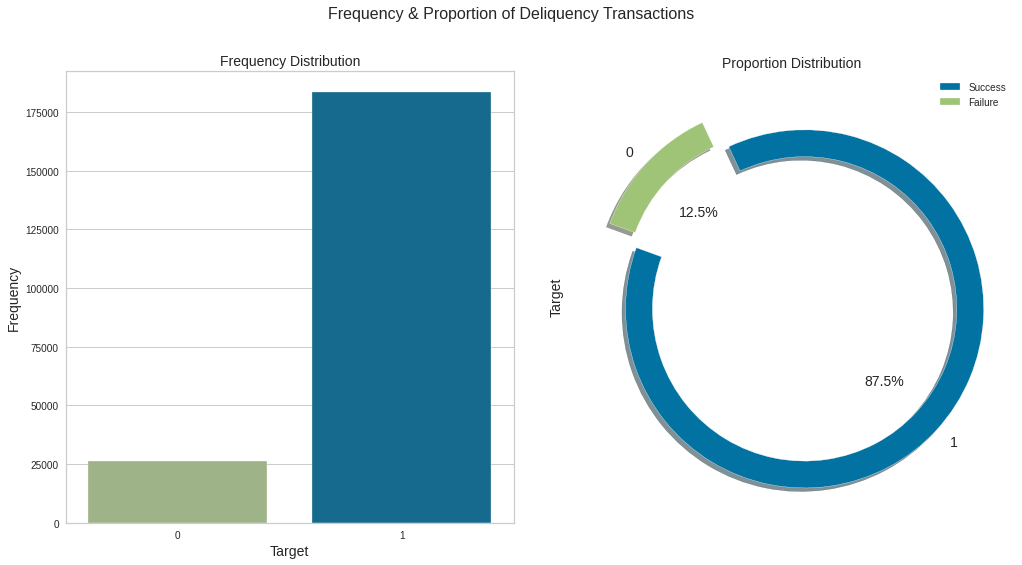

In [ ]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'target', data = data, palette = ['#9FBA81', '#0272A2'])
plt.xlabel(xlabel = 'Target', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/10
data['target'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15),
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True)
plt.legend(['Success', 'Failure'])
plt.ylabel(ylabel = 'Target', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Deliquency Transactions', y = 1.02, size = 16)
plt.show()

**Observations:**

- Around **87.5%** of **transactions** are **non-dilequent** i.e. **customers** have **paid loan amount within 5 days** duration.

- Around **12.5%** of **transations** which are found **dilequent** i.e. **customers failed** to **pay loan amount within 5 days** duration.

**<h4>Question 2: What is the average age of customers on the cellular network by delinquency?</h4>**

In [ ]:
target_group = data.groupby(['target'], as_index = False).agg('mean')
target_group

,target,length,daily_30,daily_90,rental30,rental90,last_rech_ma,last_rech_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,total_ma_rech30,median_ma_rech30,medianprebal30,cnt_ma_rech90,fr_ma_rech90,total_ma_rech90,median_ma_rech90,medianprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,num_loans30,total_loans30,max_loans30,median_loans30,num_loans90,total_loans90,max_loans90,median_loans90,paybacktime30,paybacktime90
0,0,8870.950829,1272.376756,1278.817736,2029.914812,2329.486376,3223.694134,3470.381002,1777.654728,1.303417,3548.410637,2258.849629,1036.967185,4542.476553,1.812744,4.903601,3210.102783,1198.435135,53.604368,220.177745,3753.278511,0.038338,0.059361,1.431427,8.873634,271.873754,0.028285,15.703549,9.642382,6.234386,0.027081,2.270777,2.979047
1,1,8000.422777,5967.470929,6767.666218,2787.092449,3647.987146,3831.767546,3746.713400,2281.515494,4.359527,3764.324002,8481.190759,1923.476413,3753.457808,6.957641,8.118050,13706.423257,1959.609840,97.505402,268.626962,3748.975179,0.041945,0.043766,2.948122,19.246808,275.057426,0.057700,18.922830,25.642599,6.769994,0.048787,3.559502,4.512743


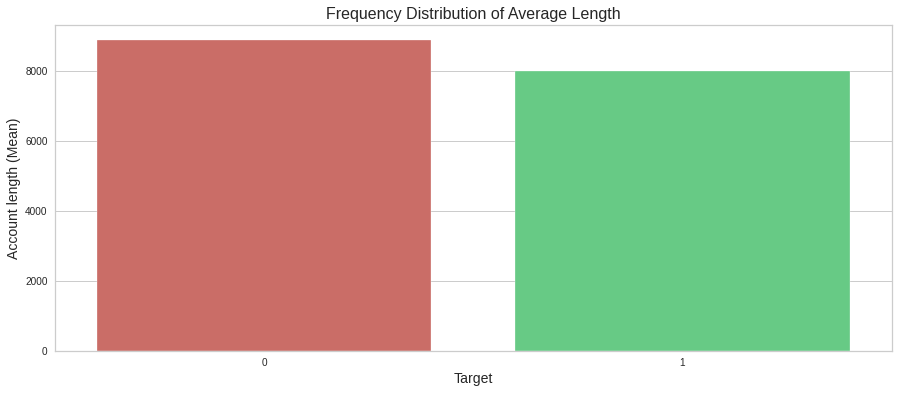

In [ ]:
plt.figure(figsize = [15, 6])
sns.barplot(x = 'target', y = 'length', data = target_group, palette = ['#DB5E56', '#56DB7F'])
plt.xlabel('Target', size = 14)
plt.ylabel('Account length (Mean)', size = 14)
plt.title('Frequency Distribution of Average Length', size = 16)
plt.show()

**Observations:**
- Customers who are **delinquent** are associated with the cellular network for an average of **8871 days**.

- On the other hand, customers who are **not delinquent** are associated with the cellular network for an average of **8000 days**.

- Customers who are delinquent have a **higher average age** on the **cellular network**.

- Some fradulent customers, tend to **accumulate the loan amount** and when it increases, they **leave the service provider and move to a new one**.

**<h4>Question 3: What is the frequency distribution of delinquent customers with date?</h4>**

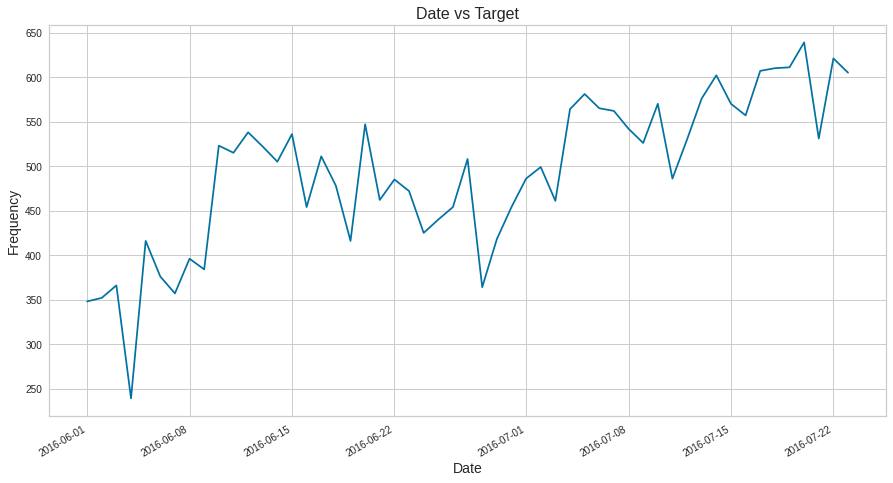

In [ ]:
figure = plt.figure(figsize = [15, 8])
data[data['target'] == 0]['date'].value_counts().plot(kind = 'line')
plt.xlabel(xlabel = 'Date', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Date vs Target', size = 16)
plt.show()

**Observation:**

- You can see that **customer** **deliquency** has **increased** **over** the **time**.

**<h4>Question 4: What does the daily amount spent from the main account indicate?</h4>**

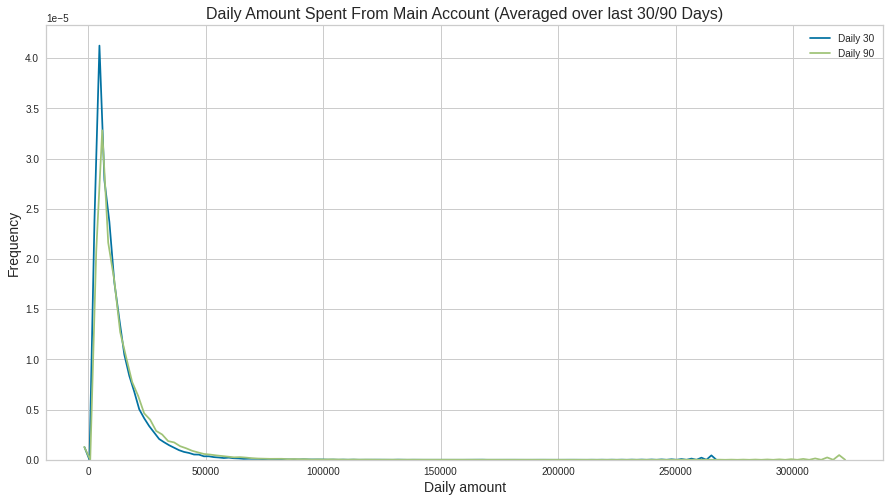

In [ ]:
plt.figure(figsize = [15, 8])
sns.kdeplot(data = data['daily_30'])
sns.kdeplot(data = data['daily_90'])
plt.xlabel(xlabel = 'Daily amount', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.legend(labels = ['Daily 30', 'Daily 90'])
plt.title('Daily Amount Spent From Main Account (Averaged over last 30/90 Days)', size = 16)
plt.show()

**Observations:**
- The **daily amount spent** from **main account**, averaged **over last 30 days** is pretty much **similar** with the averaged **over last 90 days**.

- **Therefore**, we **saw** a **similar pattern** over the **time**.

**<h4>Question 5: What does the average payback time (in days) indicate?</h4>**

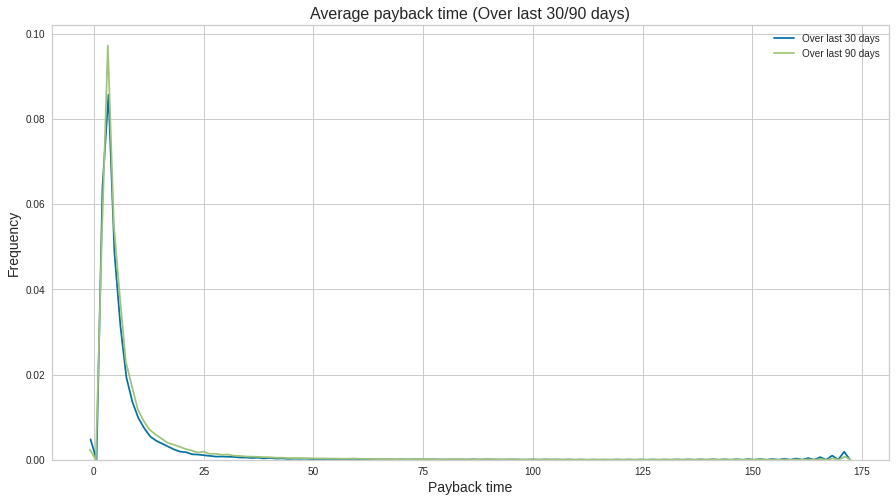

In [ ]:
plt.figure(figsize = [15, 8])
sns.kdeplot(data = data['paybacktime30'])
sns.kdeplot(data = data['paybacktime90'])
plt.xlabel(xlabel = 'Payback time', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.legend(labels = ['Over last 30 days', 'Over last 90 days'])
plt.title('Average payback time (Over last 30/90 days)', size = 16)
plt.show()

**Observations:**
- The **average payback time over last 30 days** follows a **similar** pattern to **average payback time over last 90 days**.

**<h4>Question 6: How customers with different main balance levels are paying back the loan within five days?</h4>**

- We will divide customers into no balance, low balance, average balance and high balance groups.

In [ ]:
# Filtering to create new labels for transcations -> No Balance, Low Balance, Average Balance, High Balance
lst = [data]
for column in lst:
    column.loc[column["rental30"] <= 0,  'balance'] = 'No Balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance'] = 'Low Balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance'] = 'Average Balance'
    column.loc[(column["rental30"] > 118572), 'balance'] = 'High Balance'

# Created a crosstab to get the balances with respect to target
count_balance = pd.crosstab(data['target'], data['balance']).apply(lambda x: x/x.sum() * 100)
count_balance = count_balance.transpose()

# Created a new data frame -> Contains frequency of each balance type
bal = pd.DataFrame(data['balance'].value_counts())
bal['% Subscription'] = count_balance[1]
bal.drop('balance', axis = 1, inplace = True)

# Assigning labels to No Balance, Low Balance, Average Balance, High Balance
bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

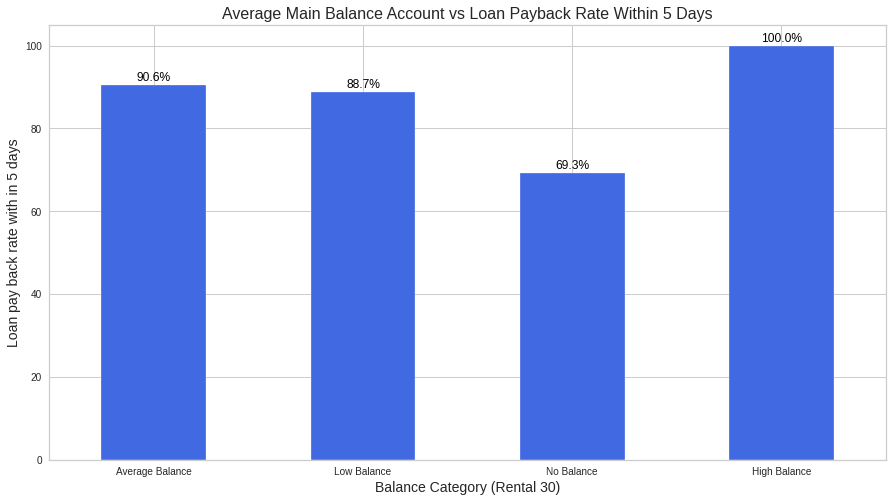

In [ ]:
plot_balance = bal['% Subscription'].plot(kind = 'bar', color = ['royalblue'], figsize = [15 ,8])
plt.xlabel(xlabel = 'Balance Category (Rental 30)', size = 14)
plt.ylabel(ylabel = 'Loan pay back rate with in 5 days', size = 14)
plt.title(label = 'Average Main Balance Account vs Loan Payback Rate Within 5 Days', size = 16)
plt.xticks(rotation = 'horizontal')

for rec, label in zip(plot_balance.patches, bal['% Subscription'].round(1).astype(str)):
  plot_balance.text(rec.get_x() + rec.get_width()/2, rec.get_height() + 1, label+'%', ha = 'center', color = 'black')

plt.show()

**Observation:**

- We can observer that **High Balance customers** have **100% loan payback rate** i.e. they are **paying loan within 5 days**.

- **No Balance customers** have **69% loan payback rate** i.e. **~31%** of **customers aren't paying** the **loan within 5 days**.

**<h4>Question 7: How is the loan payback rate of customers affected with different frequency levels of main account recharge?</h4>**

- We will divide customers into no frequency, low frequency, average frequency and high frequency groups.

In [ ]:
# Filtering to create new labels for transcations -> No Frequency, Low Frequency, Average Frequency, High Frequency
lst = [data]
for column in lst:
    column.loc[column["fr_ma_rech30"] <= 0,  'frequency'] = 'No Frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <= 1), 'frequency'] = 'Low Frequency'
    column.loc[(column['fr_ma_rech30'] > 1) & (column['fr_ma_rech30'] <= 2), 'frequency'] = 'Medium Frequency'
    column.loc[(column['fr_ma_rech30'] > 2), 'frequency'] = 'High Frequency'

# Created a crosstab to get the frequency with respect to target
count_frequency = pd.crosstab(data['target'], data['frequency']).apply(lambda x: x/x.sum() * 100)
count_frequency = count_frequency.transpose()

# Created a new data frame -> Contains frequency of each frequency type
frequency = pd.DataFrame(data['frequency'].value_counts())
frequency['% Subscription'] = count_frequency[1]
frequency.drop('frequency',axis = 1,inplace = True)

# Assigning labels to No Frequency, Low Frequency, Average Frequency, High Frequency
frequency['frequency'] = [1, 2, 0, 3]
frequency= frequency.sort_values('frequency', ascending = True)

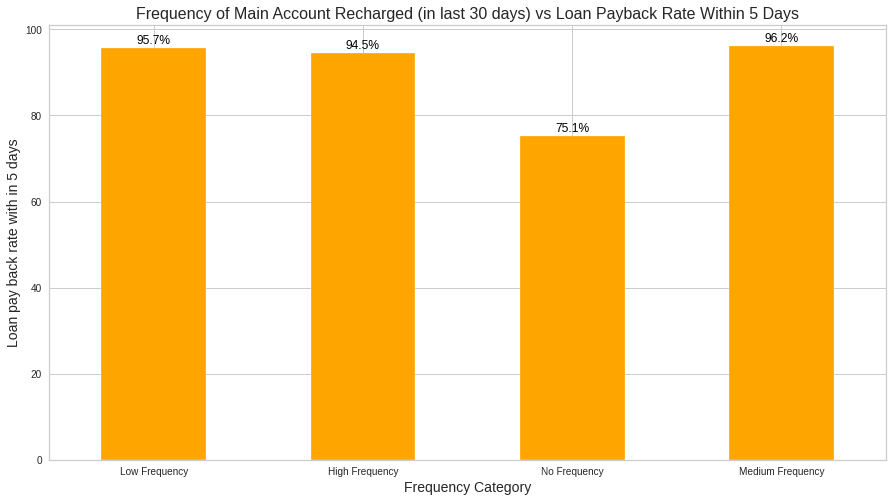

In [ ]:
plot_frequency = frequency['% Subscription'].plot(kind = 'bar', color = ['orange'], figsize = [15, 8])
plt.xlabel(xlabel = 'Frequency Category', size = 14)
plt.xticks(rotation = 'horizontal')
plt.ylabel('Loan pay back rate with in 5 days', size = 14)
plt.title('Frequency of Main Account Recharged (in last 30 days) vs Loan Payback Rate Within 5 Days', size = 16)

for rec, label in zip(plot_frequency.patches, frequency['% Subscription'].round(1).astype(str)):
  plot_frequency.text(rec.get_x() + rec.get_width()/2, rec.get_height() + 1, label+'%', ha = 'center', color = 'black')

plt.show()

**Observation:**

- **Customers** with **Low, Medium & High Frequency** have around **95% to 96%** of **loan payback rate** which is **pretty high** & **good**.

- This **signifies** around **5% to 6%** **customers** are **not paying loan amount within dedicated time** (5 days).

- **Customers** with **No Frequency** have around **75% of loan payback rate** which is **worrisome**.

**<h4>Question 8: How customers with different loan frequency levels taken, are paying back the loan within five days?</h4>**

- We will divide customers into low number of loans, average number of loans and high number of loans groups.

In [ ]:
# Filtering to create new labels for transcations -> Low Frequency Loans, Medium Frequency Loans, High Frequency Loans
lst = [data]
for column in lst:
    column.loc[(column['num_loans30'] > 0) & (column['num_loans30'] <= 1 ), 'loan_frequency'] = 'Low Frequency Loans'
    column.loc[(column['num_loans30'] > 1) & (column['num_loans30'] <= 4), 'loan_frequency'] = 'Medium Frequency Loans'
    column.loc[(column['num_loans30'] > 4), 'loan_frequency'] = 'High Frequency Loans'

# Created a crosstab to get the loan frequency with respect to target
count_loan = pd.crosstab(data['target'], data['loan_frequency']).apply(lambda x: x/x.sum() * 100)
count_loan = count_loan.transpose()

# Created a new data frame -> Contains frequency of each loan frequency type
fre = pd.DataFrame(data['loan_frequency'].value_counts())
fre['% Subscription'] = count_loan[1]
fre.drop('loan_frequency',axis = 1,inplace = True)

# Assigning labels to Low Frequency Loans, Medium Frequency Loans, High Frequency Loans
fre['fre'] = [2, 1, 0]
fre = fre.sort_values('fre',ascending = True)

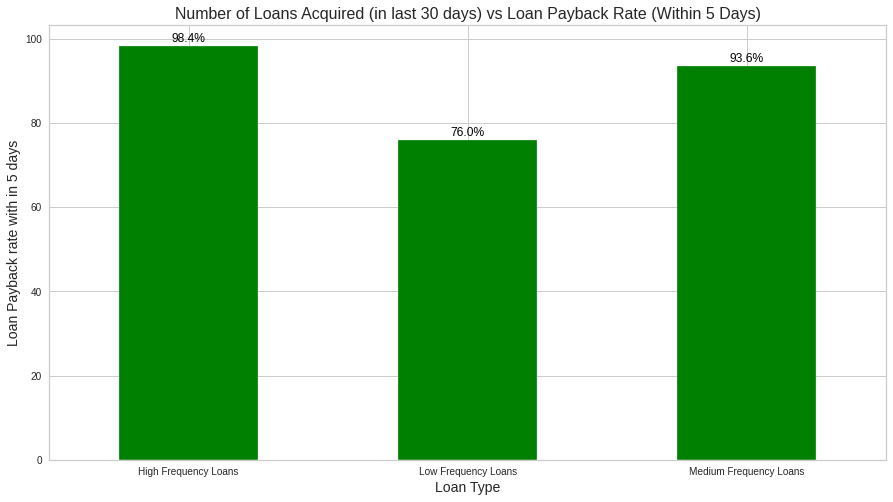

In [ ]:
plot_frequency = fre['% Subscription'].plot(kind = 'bar', color = ['green'], figsize = [15, 8])
plt.xlabel(xlabel = 'Loan Type', size = 14)
plt.xticks(rotation = 'horizontal')
plt.ylabel(ylabel = 'Loan Payback rate with in 5 days', size = 14)
plt.title(label = 'Number of Loans Acquired (in last 30 days) vs Loan Payback Rate (Within 5 Days)', size = 16)
for rec, label in zip(plot_frequency.patches, fre['% Subscription'].round(1).astype(str)):
  plot_frequency.text(rec.get_x() + rec.get_width()/2, rec.get_height() + 1, label+'%', ha = 'center', color = 'black')

plt.show()

**Observation:**

- **Customers** with **High Frequency & Medium Frequency Loans** have **98.4%** and **93.6%** of **loan payback rate** which is **pretty good**.

- **Customers** with **Low Frequency Loans** have only **76%** of **loan payback rate** which is **worrisome**.

**<h4>Question 9: How customers with different loans levels (with respect to total amount of loan taken) taken are paying back the loan within five days?</h4>**

- We will divide the customers into low amount of loans, medium amount of loans and high amount of loans groups.

In [ ]:
# Filtering to create new labels for transcations -> Low Amount Loans, Medium Amount Loans, High Amount Loans
lst = [data]
for column in lst:
    column.loc[(column['total_loans30'] > 0) & (column['total_loans30'] <= 6), 'total_amount'] = 'Low Amount Loans'
    column.loc[(column['total_loans30'] > 6) & (column['total_loans30'] <= 24), 'total_amount'] = 'Medium Amount Loans'
    column.loc[(column['total_loans30'] > 24), 'total_amount'] = 'High Amount Loans'

# Created a crosstab to get the loan amount with respect to target
count_total = pd.crosstab(data['target'], data['total_amount']).apply(lambda x: x/x.sum() * 100)
count_total = count_total.transpose()

# Created a new data frame -> Contains frequency of each loan amount type
fre1 = pd.DataFrame(data = data['total_amount'].value_counts())
fre1['% Subscription'] = count_total[1]
fre1.drop('total_amount', axis = 1, inplace = True)

# Assigning labels to Low Amount Loans, Medium Amount Loans, High Amount Loans
fre1['fre1'] = [1, 2, 0]
fre1 = fre1.sort_values('fre1', ascending = True)

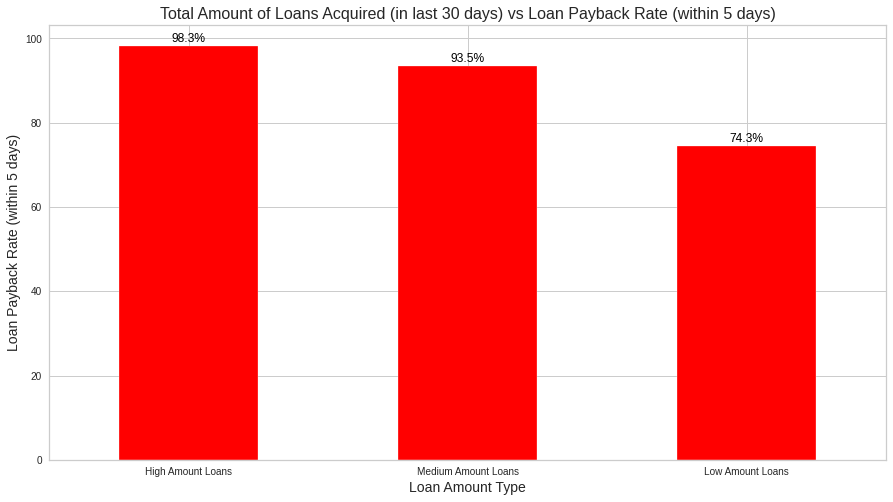

In [ ]:
plot_frequency = fre1['% Subscription'].plot(kind = 'bar', color = ['red'], figsize = [15, 8])
plt.xlabel(xlabel = 'Loan Amount Type', size = 14)
plt.xticks(rotation = 'horizontal')
plt.ylabel(ylabel = 'Loan Payback Rate (within 5 days)', size = 14)
plt.title(label = 'Total Amount of Loans Acquired (in last 30 days) vs Loan Payback Rate (within 5 days)', size = 16)

for rec, label in zip(plot_frequency.patches, fre1['% Subscription'].round(1).astype(str)):
  plot_frequency.text(rec.get_x() + rec.get_width()/2, rec.get_height() + 1, label+'%', ha = 'center', color = 'black')

plt.show()

**Observation:**

- **Customers** with **High Amount and Medium Amount Loans** have **98.3%** and **93.5%** of **loan payback rate** which is **pretty good**.

- **Customers** with **Low Amount** have only **74.3%** of **loan payback rate** which is **worrisome**.

**Note:** These are few question, from here if you would like to explore further, you are most welcome.

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---
- In this part we will **perform encoding over categorical features** and **feed it** to the **Random Forest** because machines can't understand human language.

- **Random Forest** will then **identify important features** for our model **using threshold** over the information gain over reduction in impurity.

- And **finally** we will **split** our **data** for the **model development**.

<a name = Section71></a>
### **7.1 Encoding Categorical Features**

- Before encoding the features we must identify the cardinality of the features.
- Then decide which type of encoding we should perform (Target, Dummy etc.).

In [ ]:
cat_features = []
label_len = []

# Identify Categorical Features
for i in data.columns:
  if (data[i].dtype == object):
    cat_features.append(i)

# Identify Labels Length per Feature
for i in cat_features:
  label_len.append(len(data[i].unique()))

print('Total Categorical Features:', len(cat_features))

# Categorical Feature Frame Representation
cat_frame = pd.DataFrame(data = {'Length': label_len}, index = cat_features)
cat_frame.transpose()

Total Categorical Features: 6


,msid,circle,balance,frequency,loan_frequency,total_amount
Length,186243,1,4,4,4,4


**Observation:**

- We can observer that **msid has high cardinality**. We can **drop this feature**. We need to **drop date feature as well**.

- For **rest of the features** we will **perform dummy encoding**.

**Performing Operations:**

In [ ]:
data.drop(['msid', 'date'], axis = 1, inplace = True)
data = pd.get_dummies(data = data, columns = ['circle', 'balance', 'frequency', 'loan_frequency', 'total_amount'])
print('Encoding Success!')

Encoding Success!


<a name = Section72></a>
### **7.2 Feature Selection using Random Forest**

- Now in **real world**, it is very **rare** that **all** the **features** are **important** while developing the model.

- So **instead** we **analyze** the **impact** of **input over the target**, either done by performing **statistical** **tests**(Pearson, ANOVA, Chi-Square) or by using **Random Forest**.

- **Random forests** are one the most **popular machine learning algorithms** because they **provide**:
 - **a good predictive performance**,
 - **low overfitting and**
 - **easy interpretability.**

- This **interpretability** is **derived** from the **importance of each feature** on the tree decision **evaluated** on the **reduction** in **impurity**.

- In other words, it is **easy to compute** how much **each feature is contributing** to the **decision**.

- **Below** we have **implemented** a function namely, **SelectFromModel** **available** in **Sklearn** which **uses** the **base estimator** to **identify** **important features**.

- The **importance** of feature is **determined** on the **basis** of **threshold** (a measure to calculate feature importance).

In [ ]:
X = data.drop('target', axis = 1)
y = data['target']

In [ ]:
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 14
Threshold set by Model: 0.02
Features: ['length', 'daily_30', 'daily_90', 'rental30', 'rental90', 'last_rech_ma', 'total_ma_rech30', 'median_ma_rech30', 'medianprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'total_ma_rech90', 'median_ma_rech90', 'medianprebal90']


**Visualization of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

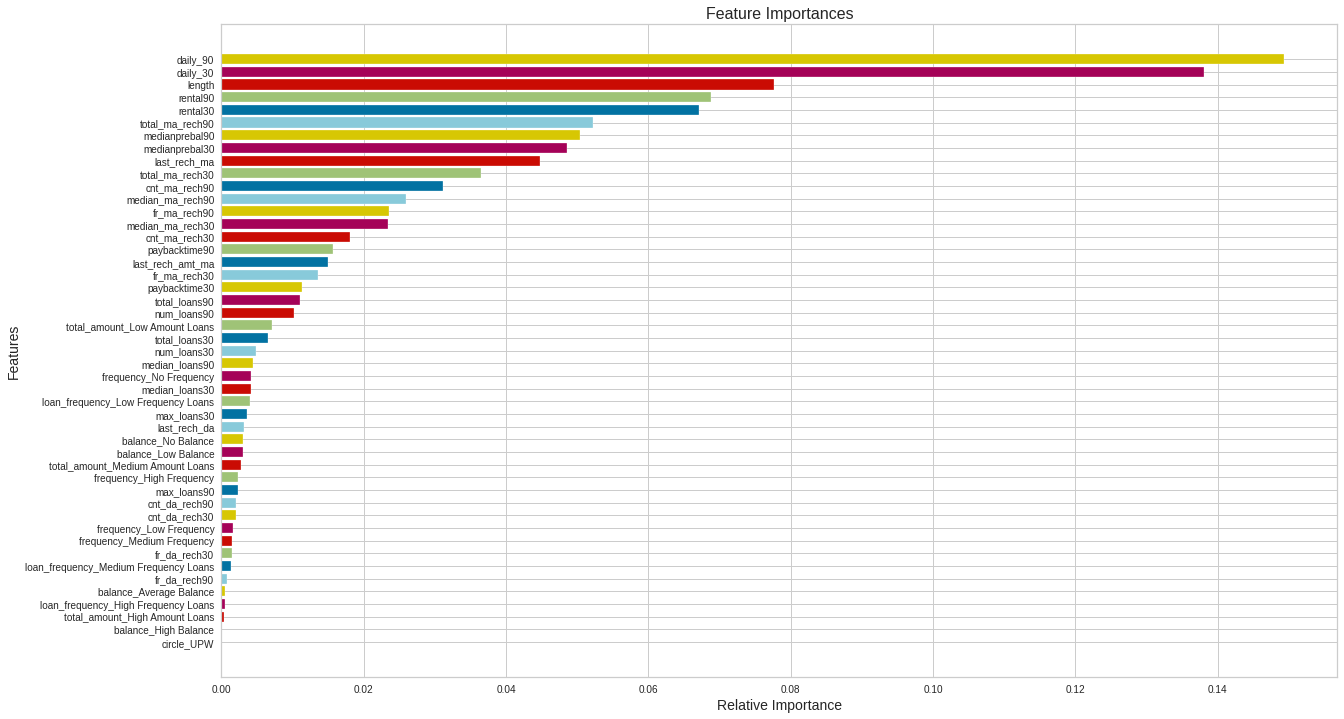

In [ ]:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

<a name = Section73></a>
### **7.3 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [ ]:
X = data[selected_feat]
y = data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (167673, 14) (167673,)
Testing Data Shape: (41919, 14) (41919,)


**Observation:**

- Now that we have split out our data, we are **good to go with model development**.

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop differnt models using only important feature** as marked important by Random Forest.

- Then we will **compare the results** obtained from them and make our observation.

- For **evaluation purpose** we will plot **precision and recall** for **each** **estimator** for which have **made** a **custom function below**.

- **Remember** that **we want generalize results** i.e. same results or error in testing data as that of training data.

- **At the end** we will **tune** our **models if required**.

<a name = Section81></a>

## **8.1 Baseline Models: Using Essential Features**

### **8.1.1 Logistic Regression**

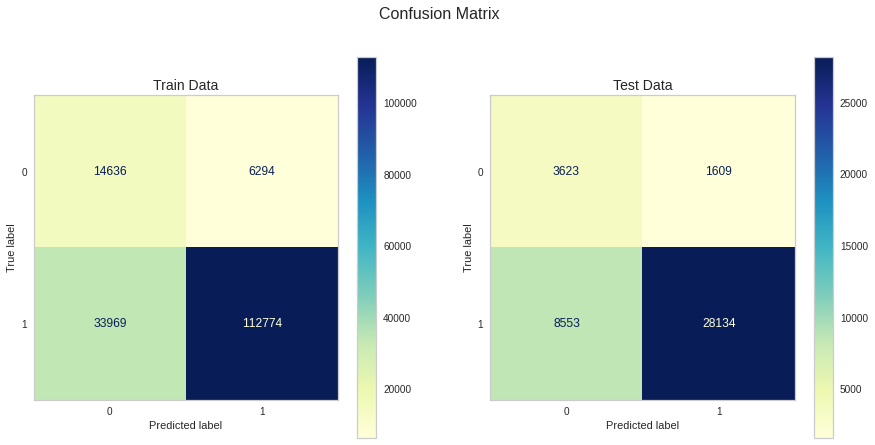

In [ ]:
log  = LogisticRegression(random_state = 42, class_weight = 'balanced')
log.fit(X_train, y_train)

y_train_pred_count = log.predict(X_train)
y_test_pred_count = log.predict(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = log, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = log, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **14636 instances correctly** for **negative class** while **112774 instances** were predicted **correctly** for **positive class**.
  - Model **identified 33969 instances negative but in actual** they **were positive**.
  - Model **identified 6294 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **3623 instances correctly** for **negative class** while **28134 instances** were predicted **correctly** for **positive class**.
  - Model **identified 8553 instance negative but in actual** they **were positive**.
  - Model **identified 1609 instances positive but in actual** they **were negative**.

In [ ]:
logistic_report_train = classification_report(y_train, y_train_pred_count)
logistic_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(logistic_report_train)
print('                    Testing Report           ')
print(logistic_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.30      0.70      0.42     20930
           1       0.95      0.77      0.85    146743

    accuracy                           0.76    167673
   macro avg       0.62      0.73      0.63    167673
weighted avg       0.87      0.76      0.80    167673

                    Testing Report           
              precision    recall  f1-score   support

           0       0.30      0.69      0.42      5232
           1       0.95      0.77      0.85     36687

    accuracy                           0.76     41919
   macro avg       0.62      0.73      0.63     41919
weighted avg       0.86      0.76      0.79     41919



**Observation:**

- We can **observer generalized results** here.

- The only **problem** is that the **precision and recall** scores for **negative class** are **poor** due to **class imbalance**.

### **8.1.2 Random Forest Classifier**

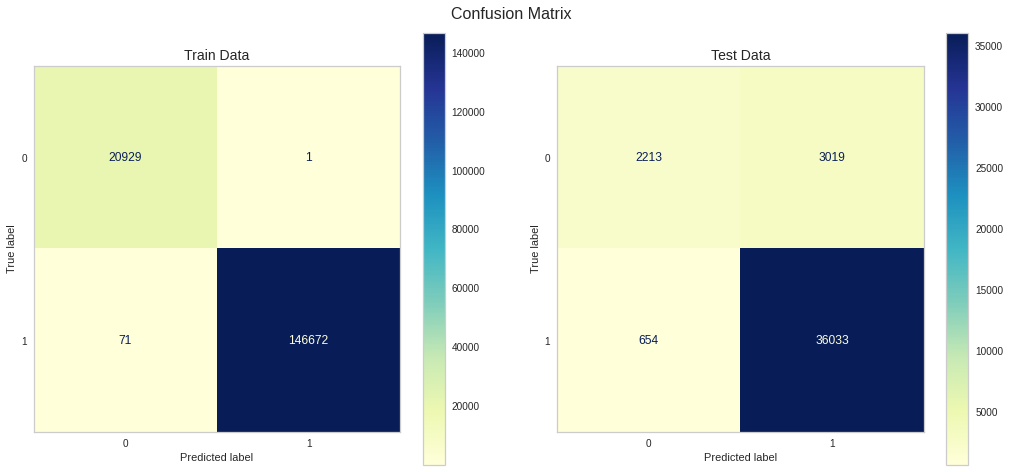

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, n_jobs = -1, class_weight = 'balanced', random_state = 42)
rfc.fit(X_train, y_train)

y_train_pred_count = rfc.predict(X_train)
y_test_pred_count = rfc.predict(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = rfc, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = rfc, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.tight_layout(pad = 3.0)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **20929 instances correctly** for **negative class** while **146672 instances** were predicted **correctly** for **positive class**.
  - Model **identified 71 instances negative but in actual** they **were positive**.
  - Model **identified 1 instance positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **2213 instances correctly** for **negative class** while **36033 instances** were predicted **correctly** for **positive class**.
  - Model **identified 654 instance negative but in actual** they **were positive**.
  - Model **identified 3019 instances positive but in actual** they **were negative**.

In [ ]:
rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(rfc_report_train)
print('                    Testing Report           ')
print(rfc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20930
           1       1.00      1.00      1.00    146743

    accuracy                           1.00    167673
   macro avg       1.00      1.00      1.00    167673
weighted avg       1.00      1.00      1.00    167673

                    Testing Report           
              precision    recall  f1-score   support

           0       0.77      0.42      0.55      5232
           1       0.92      0.98      0.95     36687

    accuracy                           0.91     41919
   macro avg       0.85      0.70      0.75     41919
weighted avg       0.90      0.91      0.90     41919



**Observation:**

- If we **compare** this **model's performance** with **Logisitc Regresssion**, we can **observer** **improvement** here.

- Again **results** on **negative class** are really **poor** due to **class imbalance**.

- Apart from that we can **observer overfitting** here.

### **8.1.3 Extreme Gradient Boosting Classifier**

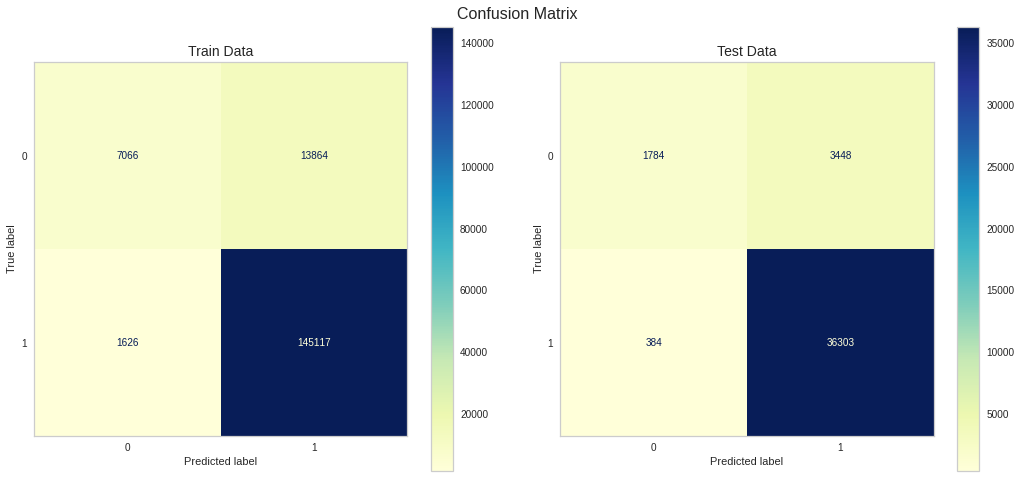

In [ ]:
xgb = XGBClassifier(random_state = 42, n_jobs = -1)
xgb.fit(X_train, y_train)

y_train_pred_count = xgb.predict(X_train)
y_test_pred_count = xgb.predict(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = xgb, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = xgb, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.tight_layout(pad = 3.0)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **7066 instances correctly** for **negative class** while **145117 instances** were predicted **correctly** for **positive class**.
  - Model **identified 1626 instances negative but in actual** they **were positive**.
  - Model **identified 13864 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **1784 instances correctly** for **negative class** while **36303 instances** were predicted **correctly** for **positive class**.
  - Model **identified 384 instance negative but in actual** they **were positive**.
  - Model **identified 3448 instances positive but in actual** they **were negative**.

In [ ]:
xgb_report_train = classification_report(y_train, y_train_pred_count)
xgb_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(xgb_report_train)
print('                    Testing Report           ')
print(xgb_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.81      0.34      0.48     20930
           1       0.91      0.99      0.95    146743

    accuracy                           0.91    167673
   macro avg       0.86      0.66      0.71    167673
weighted avg       0.90      0.91      0.89    167673

                    Testing Report           
              precision    recall  f1-score   support

           0       0.82      0.34      0.48      5232
           1       0.91      0.99      0.95     36687

    accuracy                           0.91     41919
   macro avg       0.87      0.67      0.72     41919
weighted avg       0.90      0.91      0.89     41919



**Observation:**

- If we **compare** this **model's performance** with others, we can **observer** **this model performed better** than other two.

- This time we could **observe** **good results on precision** on **negative class** while **on recall**, it **couldn't do so well**.

<a name = Section82></a>

## **8.2 Oversampling Models: Using Essential Features**

#### **SMOTE Technique & its Implementation**

- SMOTE refers to **Synthetic Minority Oversampling Technique**.

- It **aims** to **balance class distribution** by **randomly** **increasing minority class** examples **by replicating** them.

- It **synthesises** **new minority instances** **between** **existing** minority **instances**.

- **It generates the virtual training records by linear interpolation for the minority class.**

- These **synthetic training records are generated by randomly selecting** one or more of the k-nearest neighbors for each **example in the minority class**.

- **After** the **oversampling process**, the **data is reconstructed** and several classification models can be applied for the processed data.

**Before Implimenting SMOTE**

In [ ]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (167673, 14) (167673,)
Testing Data Shape: (41919, 14) (41919,)


**Performing SMOTE Operation**

In [ ]:
# Have some patience, may take some time

sm = SMOTE(random_state = 42, ratio = 1)
X1, y1 = sm.fit_sample(X, y)

X_new = pd.DataFrame(data = X1, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size = 0.2, random_state = 42, stratify = y1)

In [ ]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (293488, 14) (293488,)
Testing Data Shape: (73372, 14) (73372,)


<a name = Section821></a>
### **8.2.1 Logistic Regression**

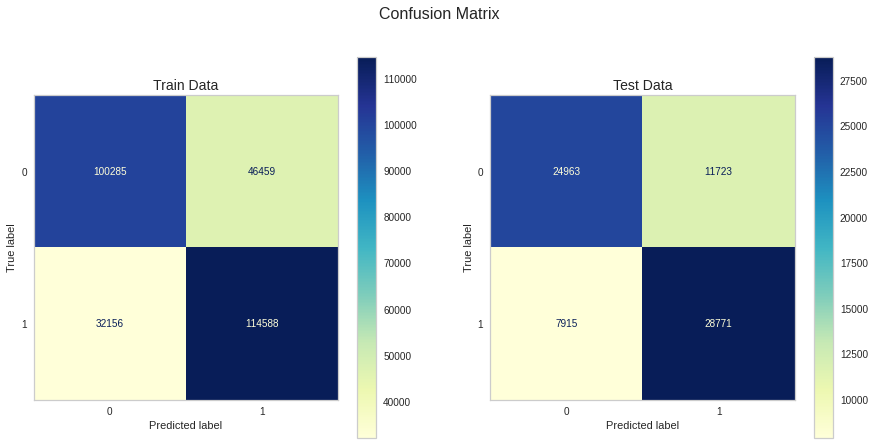

In [ ]:
log  = LogisticRegression(random_state = 42, class_weight = 'balanced')
log.fit(X_train, y_train)

y_train_pred_count = log.predict(X_train)
y_test_pred_count = log.predict(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = log, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = log, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **100285 instances correctly** for **negative class** while **115488 instances** were predicted **correctly** for **positive class**.
  - Model **identified 32156 instances negative but in actual** they **were positive**.
  - Model **identified 46459 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **24963 instances correctly** for **negative class** while **28771 instances** were predicted **correctly** for **positive class**.
  - Model **identified 7915 instance negative but in actual** they **were positive**.
  - Model **identified 11723 instances positive but in actual** they **were negative**.

In [ ]:
logistic_report_train = classification_report(y_train, y_train_pred_count)
logistic_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(logistic_report_train)
print('                    Testing Report           ')
print(logistic_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.76      0.68      0.72    146744
           1       0.71      0.78      0.74    146744

    accuracy                           0.73    293488
   macro avg       0.73      0.73      0.73    293488
weighted avg       0.73      0.73      0.73    293488

                    Testing Report           
              precision    recall  f1-score   support

           0       0.76      0.68      0.72     36686
           1       0.71      0.78      0.75     36686

    accuracy                           0.73     73372
   macro avg       0.73      0.73      0.73     73372
weighted avg       0.73      0.73      0.73     73372



**Observation:**

- We can **observe better results** than baseline model.

- The **results are generalized** on both training and testing data but we **will see if we could improve** these in upcoming part.

### **8.1.2 Random Forest Classifier**

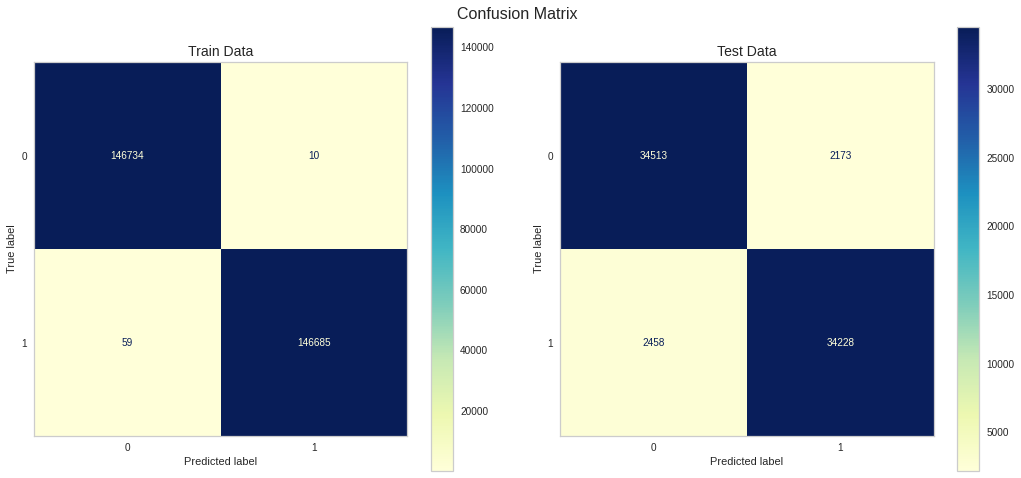

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, n_jobs = -1, class_weight = 'balanced', random_state = 42)
rfc.fit(X_train, y_train)

y_train_pred_count = rfc.predict(X_train)
y_test_pred_count = rfc.predict(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = rfc, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = rfc, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.tight_layout(pad = 3.0)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **146734 instances correctly** for **negative class** while **146685 instances** were predicted **correctly** for **positive class**.
  - Model **identified 59 instances negative but in actual** they **were positive**.
  - Model **identified 10 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **34513 instances correctly** for **negative class** while **34228 instances** were predicted **correctly** for **positive class**.
  - Model **identified 2458 instance negative but in actual** they **were positive**.
  - Model **identified 2173 instances positive but in actual** they **were negative**.

In [ ]:
rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(rfc_report_train)
print('                    Testing Report           ')
print(rfc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    146744
           1       1.00      1.00      1.00    146744

    accuracy                           1.00    293488
   macro avg       1.00      1.00      1.00    293488
weighted avg       1.00      1.00      1.00    293488

                    Testing Report           
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     36686
           1       0.94      0.93      0.94     36686

    accuracy                           0.94     73372
   macro avg       0.94      0.94      0.94     73372
weighted avg       0.94      0.94      0.94     73372



**Observation:**

- This time around we could **see better results** on random forest as well.

- **Previously** the **results were not good** for **negative class**, but **this time it has improved** a lot.

- But **still there's** a problem of **overfitting**. One could **either tune the setting or try more complex model** such as XGBoost.

### **8.1.3 Extreme Gradient Boosting Classifier**

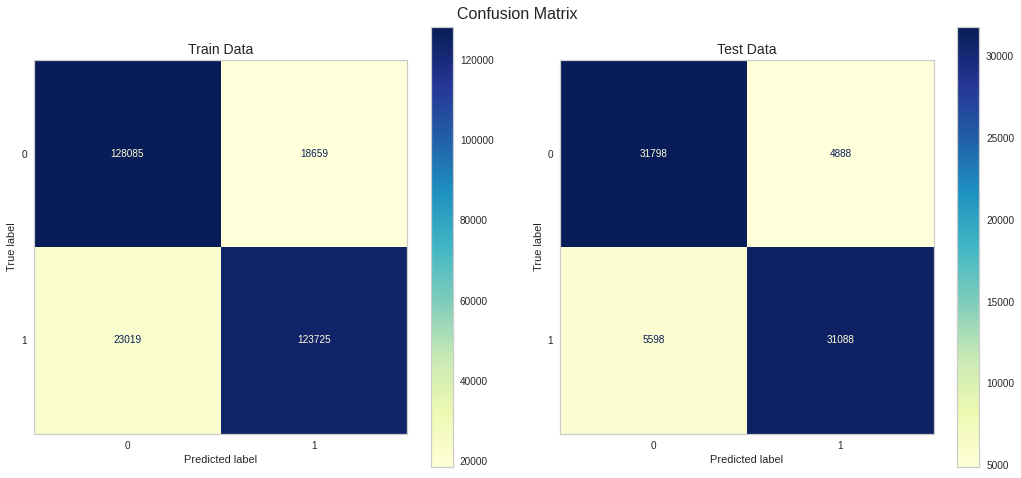

In [ ]:
xgb = XGBClassifier(random_state = 42, n_jobs = -1)
xgb.fit(X_train, y_train)

y_train_pred_count = xgb.predict(X_train)
y_test_pred_count = xgb.predict(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = xgb, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = xgb, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.tight_layout(pad = 3.0)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **128085 instances correctly** for **negative class** while **123725 instances** were predicted **correctly** for **positive class**.
  - Model **identified 23019 instances negative but in actual** they **were positive**.
  - Model **identified 18659 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **31798 instances correctly** for **negative class** while **31088 instances** were predicted **correctly** for **positive class**.
  - Model **identified 5598 instance negative but in actual** they **were positive**.
  - Model **identified 4888 instances positive but in actual** they **were negative**.

In [ ]:
xgb_report_train = classification_report(y_train, y_train_pred_count)
xgb_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(xgb_report_train)
print('                    Testing Report           ')
print(xgb_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.85      0.87      0.86    146744
           1       0.87      0.84      0.86    146744

    accuracy                           0.86    293488
   macro avg       0.86      0.86      0.86    293488
weighted avg       0.86      0.86      0.86    293488

                    Testing Report           
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     36686
           1       0.86      0.85      0.86     36686

    accuracy                           0.86     73372
   macro avg       0.86      0.86      0.86     73372
weighted avg       0.86      0.86      0.86     73372



**Observation:**

- We can **observe generalized results** without overfitting.

- **Last time** we saw that the **recall was very poor**, but **this time it has improved**.

<a name = Section83></a>

## **8.3 Performance Chart**

|Id|Baseline Model|#|Train Precision (0)|Train Precision (1)|Train Recall (0)|Train Recall (1)|Train Accuracy|#|Test Precision (0)|Test Precision (0)|Test Recall (0)|Test Recall (1)|Test Accuracy|
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|01|Logistic Regression|#|0.30|0.95|0.70|0.77|0.76|#|0.30|0.95|0.69|0.77|0.76|
|02|Random Forest Classifier|#|1|1|1|1|1|#|0.77|0.92|0.42|0.98|0.91|
|03|XGBoost Classifier|#|0.81|0.91|0.34|0.99|0.91|#|0.82|0.91|0.34|0.99|0.91|

|Id|Oversampling Model|#|Train Precision (0)|Train Precision (1)|Train Recall (0)|Train Recall (1)|Train Accuracy|#|Test Precision (0)|Test Precision (0)|Test Recall (0)|Test Recall (1)|Test Accuracy|
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|01|Logistic Regression|#|0.76|0.71|0.68|0.78|0.73|#|0.76|0.71|0.68|0.78|0.73
|02|Random Forest Classifier|#|1|1|1|1|1|#|0.93|0.94|0.94|0.93|0.94|
|03|XGBoost Classifier|#|0.85|0.87|0.87|0.84|0.86|#|0.85|0.86|0.87|0.85|0.86|


<a name = Section9></a>

---
# **9. Conclusion**
---

- We **studied in depth about the data**, its **characteristics** and its **distribution**.

- We **explored various questions** related to customer delequency.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

  - length, daily_30, daily_90, rental30, rental90, last_rech_ma, total_ma_rech30, median_ma_rech30, medianprebal30, cnt_ma_rech90, fr_ma_rech90, total_ma_rech90, median_ma_rech90, medianprebal90
  
- We **performed model development** with baseline and oversampling criteria.

- Using **baseline criteria** we were able to **achieve pretty good results** on **positive class** but not on **negative class, results were poor**.

- In order **to overcome class imbalance**, we **performed SMOTE** and then **again performed model development**. We **saw** pretty **amazing results on both the classes**.

- Now it is **entirely dependent** **whether** we want to **use Random Forest or XGBoost**.

- We **finalized XGBoost** but **we would like you to experiment** with **Random Forest** with differnt tunning settings.

- This **final model** will now can **help us** in **identifying** which customers were **delinquent** and **will be deliquent**.

- This will **help the business** in **offering loans more carefully** for **delinquent customers**.